<a href="https://colab.research.google.com/github/uveysturhan/condensed-matter-related/blob/main/Results_for_Harper_Equation_and_Hamiltonian_Approach.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

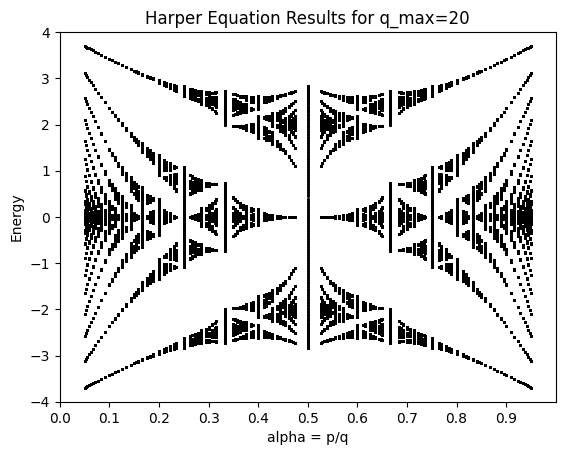

eigvals = [-2.82842712  2.82842712]


In [ ]:
#Using Harper Equation, lattice size is variable and q x q, where p / q = flux ratio.
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
#Using the Harper equation, we find the Harper matrix (the Hamiltonian) using the following function.
def find_harper_matrix(q, alpha, kx, ky, t=1.0):
    H = np.zeros((q, q), dtype=np.complex128)
    for n in range(q):
        H[n, n] = -2.0* t * np.cos(kx + 2.0*np.pi*alpha*n) #Diagonal elements in the Harper matrix
        n_plus = (n + 1) % q #Periodic boundary conditions
        H[n, n_plus] += -t #Non-diagonal elements
        H[n_plus, n] += -t #the Hamiltonian is hermitean
    if q==2:
      H[0,q-1]= -t*(1 + np.exp(-1j * q * ky))
      H[q-1,0]= -t*(1 + np.exp(1j * q * ky))
    else:
      H[0,q-1]= -t*(np.exp(-1j * q * ky))
      H[q-1,0]= -t*(np.exp(1j * q * ky))

    return H

#Then, after calculating eigenvalues (energies) of the Hamiltonian, we plot the energies against different rational flux ratio.

def plot_butterfly(q_max=15, kx_samples=150, t=1.0): #We loop over different kx values in the Brillouin zone to get the full spectrum
    alphas_fractions = []
    alphas = []
    energies = []

    for q in range(1 , q_max+1):
      for p in range(1 , q):
        fraction = Fraction(p,q)
        alphas_fractions.append(Fraction(p, q))
    alphas_fractions = list(set(alphas_fractions))

    for alpha in alphas_fractions:
      q = alpha.denominator
      for i in range(-kx_samples, kx_samples+1):
        Hq = find_harper_matrix(q, alpha, np.pi * i / (q*kx_samples), np.pi * i / (q*kx_samples), t=1.0) #Hamiltonian size: (q, q)
        #We find the Hamiltonian for different values of parameters and store the energies and flux ratios in the respective lists.
        eigvals = np.linalg.eigvalsh(Hq)
        alphas.extend([float(alpha)]*len(eigvals))
        energies.extend(eigvals)

    plt.scatter(alphas, energies, s=1, color='black') #We scatter plot the energies against the flux ratio
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.xticks(np.arange(0,1,0.1))
    plt.title(f'Harper Equation Results for q_max={q_max}')
    plt.xlim(0, 1)
    plt.ylim(-4, 4)
    plt.show()


plot_butterfly(q_max=20, kx_samples=100)
find_harper_matrix(2, 1/2, np.pi/2, np.pi/2)
eigvals = np.linalg.eigvalsh(find_harper_matrix(2, 1/2, 0, 0))
print(f"eigvals = {eigvals}")
#My calculation: E = 2*sqrt(cos^2(kx) + cos^2(ky)), -2*sqrt(cos^2(kx) + cos^2(ky))= 2*sqrt(2), 2*sqrt(2) = (approx) = 2*1.4, -2*1.4 = 2.8, -2.8

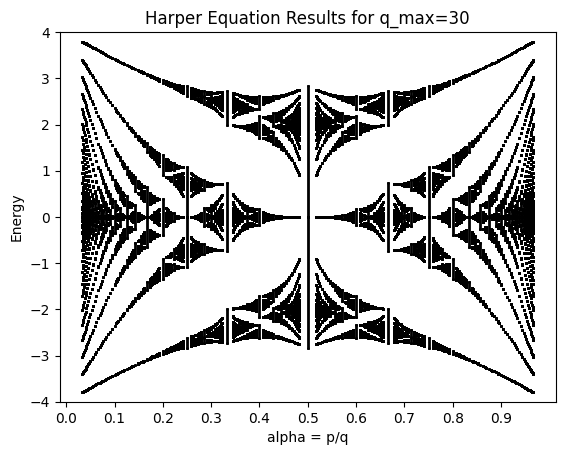

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667]


In [ ]:
#Using Harper Equation, lattice size is variable and q x q, where p / q = flux ratio.
#In this approach, we find the band edges at (kx,ky)=[(0,0), (pi/q, pi/q)]. (corresponding to minimum and maximum energy) and then draw a line between the edges.
from fractions import Fraction
import numpy as np
import matplotlib.pyplot as plt
#Using the Harper equation, we find the Harper matrix (the Hamiltonian) using the following function.
def find_harper_matrix(q, alpha, kx, ky, t=1.0):
    H = np.zeros((q, q), dtype=np.complex128)
    for n in range(q):
        H[n, n] = -2.0* t * np.cos(kx + 2.0*np.pi*alpha*n) #Diagonal elements in the Harper matrix
        n_plus = (n + 1) % q #Periodic boundary conditions
        H[n, n_plus] += -t #Non-diagonal elements
        H[n_plus, n] += -t #the Hamiltonian is hermitean
    #employ periodic boundary conditions
    if q==2:
      H[0,q-1]= -t*(1+np.exp(-1j * q * ky))
      H[q-1,0]= -t*(1+np.exp(1j * q * ky))
    else:
      H[0,q-1]= -t*(np.exp(-1j * q * ky))
      H[q-1,0]= -t*(np.exp(1j * q * ky))

    return H

#Then, after calculating eigenvalues (energies) of the Hamiltonian, we plot the energies against different rational flux ratio.
alpha_uniq_check=[]
def plot_butterfly(q_max=15, t=1.0): #We loop over different kx values in the Brillouin zone to get the full spectrum
    for q in range(1 , q_max+1):
      for p in range(1 , q):
        alpha = Fraction(p, q)
        if alpha not in alpha_uniq_check:
          alpha_uniq_check.append(alpha)
          alpha_list = [float(alpha)]*q
          Hq1 = find_harper_matrix(q, float(alpha),0,0, t=1.0) #Hamiltonian size: (q, q)
          Hq2 = find_harper_matrix(q, float(alpha), np.pi / q, np.pi/q, t=1.0) #Hamiltonian size: (q, q)
          #We find the Hamiltonian for different values of parameters and store the energies and flux ratios in the respective lists.
          eigvals1 = np.linalg.eigvalsh(Hq1)
          eigvals2 = np.linalg.eigvalsh(Hq2)
          #eigvals3 = np.linalg.eigvalsh(Hq3)
          for i in range(len(eigvals1)):
              plt.plot([float(alpha), float(alpha)], [eigvals1[i],eigvals2[i]], "-",  c="black", linewidth=2)
              plt.plot(alpha_list, eigvals1, "o", c="black", markersize=0.5)
              plt.plot(alpha_list, eigvals2, "o", c="black", markersize=0.5)
              #plt.plot(alpha_list, eigvals3, "o", c="black", markersize=0.1)
        else:
          pass
    plt.xlabel('alpha = p/q')
    plt.ylabel('Energy')
    plt.xticks(np.arange(0,1,0.1))
    plt.title(f'Harper Equation Results for q_max={q_max}')
    plt.ylim(-4, 4)
    plt.show()
    print(alpha_list)

plot_butterfly(q_max=30)

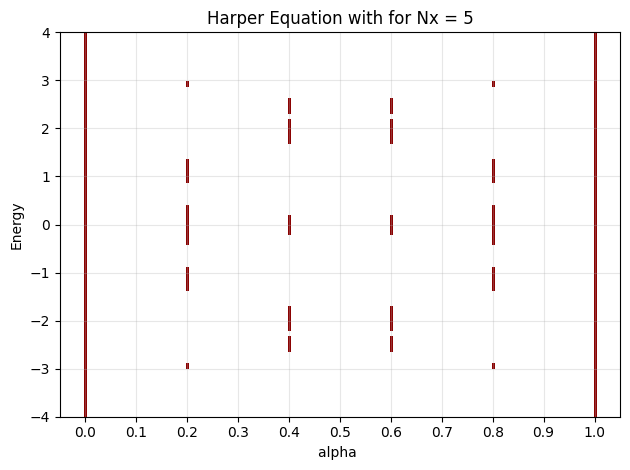

[0.  0.2 0.4 0.6 0.8 1. ]


In [36]:
#Harper Equation Approach with Fixed Lattice Size
import numpy as np
import matplotlib.pyplot as plt
from fractions import Fraction

def construct_harper_matrix(Nx, alpha, ky, kx):
    H = np.zeros((Nx, Nx), dtype=complex) #Lattice size is fixed

    for n in range(Nx): #we build the harper matrix
        H[n, n] = -2 * np.cos(2 * np.pi * alpha * n + ky)
        if n < Nx - 1:
            H[n, n+1] = -1.0
            H[n+1, n] = -1.0

    H[Nx-1, 0] = -np.exp(-1j * kx) #bloch conditions
    H[0, Nx-1] = -np.exp(1j * kx)

    return H

def plot_harper_butterfly(Nx, ky_samples=50, kx_samples=50):
    #flux_values = np.linspace(0,1,30)
    flux_values = np.arange(0, Nx+1) / Nx #flux values are chosen such that alpha.Nx=integer.
    #flux_values = np.append(flux_values, 1/3)
    #flux_values = np.linspace(0,1,100)
    ky_values = np.linspace(0, np.pi, ky_samples, endpoint=False)
    kx_values = np.linspace(0, np.pi, kx_samples, endpoint=False)

    all_flux = []
    all_energies = []

    #Loop over flux and momentum values
    for alpha in flux_values:
      kx_values = np.linspace(0, np.pi, kx_samples, endpoint=False)
      ky_values = np.linspace(0, np.pi, ky_samples, endpoint=False)
      for ky in ky_values:
        for kx in kx_values:
          H = construct_harper_matrix(Nx, alpha, ky, kx)
          eigvals = np.linalg.eigvalsh(H)
          all_flux.extend([alpha] * len(eigvals))
          all_energies.extend(eigvals)
    plt.scatter(all_flux, all_energies, s=1, color='darkred')
    plt.xticks(np.arange(0,1.1,0.1))
    plt.xlabel('alpha ')
    plt.ylabel('Energy')
    plt.ylim(-4,4)
    plt.title(f'Harper Equation with for Nx = {Nx}')
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()
    print(flux_values)

H1=construct_harper_matrix(5, 1/5, 0, 0)

plot_harper_butterfly(5)

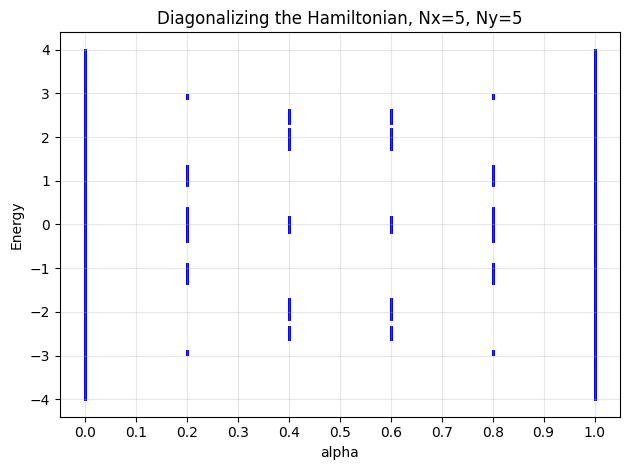

In [37]:
#In this approach, we directly find the Hamiltonian for a given lattice size.
import numpy as np
import matplotlib.pyplot as plt

def find_hamiltonian_2d(Nx, Ny, alpha, kx=0.0, ky=0.0, t=1.0):
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)
    for n in range(Ny):
        for m in range(Nx):
            i = n * Nx + m

            # x-direction
            m_plus = (m + 1) % Nx
            j = n * Nx + m_plus
            phase_x = 1.0
            if m_plus < m:
                phase_x = np.exp(1j * kx) #boundary(magnetic translation phase)

            H[i, j] = -t * phase_x
            H[j, i] = -t * np.conjugate(phase_x)

            # y-direction
            n_plus = (n + 1) % Ny
            k = n_plus * Nx + m

            hopping_phase_y = np.exp(1j * 2.0 * np.pi * alpha * m)
            boundary_phase_y = 1.0
            if n_plus < n:
                boundary_phase_y = np.exp(1j * ky) #boundary(magnetic translation phase)

            phase_y = hopping_phase_y * boundary_phase_y

            H[i, k] = -t * phase_y
            H[k, i] = -t * np.conjugate(phase_y)

    return H

Nx, Ny = 5, 5
alpha_values = np.arange(0, Nx+1, 1)/Nx #flux values are chosen such that alpha.Nx=integer.

all_alphas = []
all_energies = []

num_kx = 15 #how many momentum values we will use
num_ky = 15

#Loop over momentum and flux values

for alpha in alpha_values:
    for kx_i in range(num_kx):
        for ky_i in range(num_ky):
            kx =  np.pi * kx_i / num_kx
            ky =  np.pi * ky_i / num_ky
            H = find_hamiltonian_2d(Nx, Ny, alpha, kx=kx, ky=ky)
            eigvals = np.linalg.eigvalsh(H)
            all_alphas.extend([alpha] * len(eigvals))
            all_energies.extend(eigvals)

plt.scatter(all_alphas, all_energies, s=1, color="blue")
plt.title(f"Diagonalizing the Hamiltonian, Nx={Nx}, Ny={Ny}")
plt.xlabel("alpha")
plt.ylabel("Energy")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


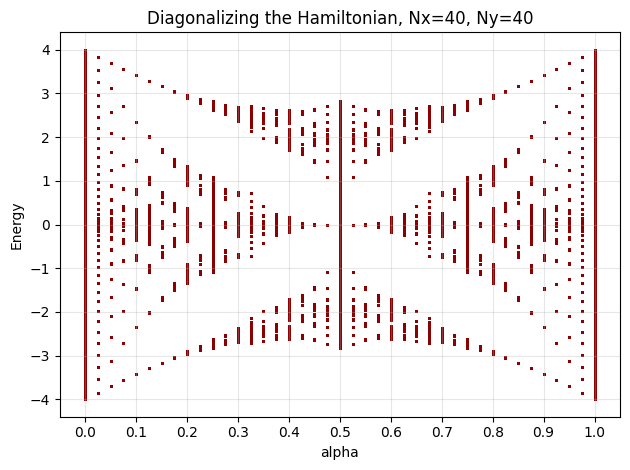

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def find_hamiltonian_2d(Nx, Ny, alpha, kx=0.0, ky=0.0, t=1.0):
    H = np.zeros((Nx*Ny, Nx*Ny), dtype=np.complex128)
    for n in range(Ny):
        for m in range(Nx):
            i = n * Nx + m

            # x-direction
            m_plus = (m + 1) % Nx
            j = n * Nx + m_plus
            phase_x = 1.0
            if m_plus < m:
                phase_x = np.exp(1j * kx)

            H[i, j] = -t * phase_x
            H[j, i] = -t * np.conjugate(phase_x)

            # y-direction
            n_plus = (n + 1) % Ny
            k = n_plus * Nx + m

            hopping_phase_y = np.exp(1j * 2.0 * np.pi * alpha * m)
            boundary_phase_y = 1.0
            if n_plus < n:
                boundary_phase_y = np.exp(1j * ky)

            phase_y = hopping_phase_y * boundary_phase_y

            H[i, k] = -t * phase_y
            H[k, i] = -t * np.conjugate(phase_y)

    return H

Nx, Ny = 40, 40
alpha_values = np.arange(0, Nx+1, 1)/Nx

all_alphas = []
all_energies = []

num_kx = 6
num_ky = 6

for alpha in alpha_values:
    for kx_i in range(num_kx):
        for ky_i in range(num_ky):
            kx = 2.0 * np.pi * kx_i / num_kx
            ky = 2.0 * np.pi * ky_i / num_ky
            H = find_hamiltonian_2d(Nx, Ny, alpha, kx=kx, ky=ky)
            eigvals = np.linalg.eigvalsh(H)
            all_alphas.extend([alpha] * len(eigvals))
            all_energies.extend(eigvals)

plt.scatter(all_alphas, all_energies, s=1, color="darkred")
plt.title(f"Diagonalizing the Hamiltonian, Nx={Nx}, Ny={Ny}")
plt.xlabel("alpha")
plt.ylabel("Energy")
plt.xticks(np.arange(0, 1.1, 0.1))
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()


# Finding Energy-Momentum Relation
Harper equation is given by the following expression
\begin{gather}
 c_{m+1} + c_{m-1} + 2cos(2\pi\phi - ky)c_{m}= \frac{E}{t}c_m \\
 c_{m + q}=e^{i k_x q}c_m
\end{gather}
We will consider $2 \times 2$ lattice with $\phi=\frac{1}{2}$. We have the following equations for $m=1,2$ and periodic Bloch conditions to find $c_3, c_0$:
\begin{gather}
 c_{2} + c_{0} + 2cos(\pi - ky)c_{1}= \frac{E}{t}c_1 \\
 c_{3} + c_{1} + 2cos(2\pi - ky)c_{2}= \frac{E}{t}c_2 \\
 c_3 = e^{2 i k_x }c_1 \\
 c_2 = e^{2 i k_x }c_0
\end{gather}
Using Bloch conditions and simplifying, we can write the Harper equation as a matrix equation:
\begin{gather}
 \begin{bmatrix}
2cos(k_y) & 1 + 2e^{-2ik_x} \\
1 + 2e^{2ik_x} & -2cos(k_y)
\end{bmatrix} \begin{bmatrix} c_1 \\
c_2
\end{bmatrix} = \frac{E}{t} \begin{bmatrix} c_1 \\
c_2
\end{bmatrix}
\end{gather}
Using Cayley Hamilton equation, we can find the eigenvalues:
\begin{gather}
(\frac{E}{t})^2 - (TrH) \frac{E}{t} + detH = 0 \\
TrH = 0 \\
 detH=-4cos^2(k_y) -(1+ e^{-2ik_x})(1+ e^{2ik_x}) = -4cos^2(k_y)-  4cos^2(k_x) \\
 E = \pm 2t \sqrt(cos^2(k_y) +  cos^2(k_x))
\end{gather}


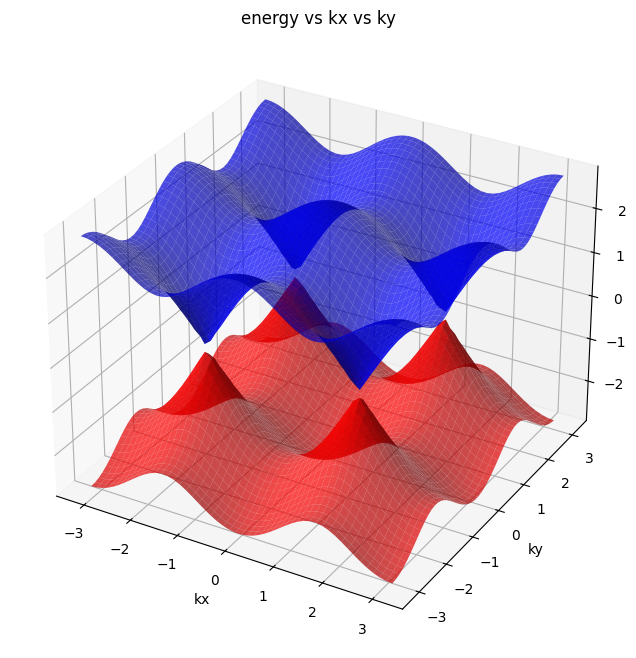

In [38]:
import numpy as np
import matplotlib.pyplot as plt

#kx and ky ranges from minus pi to plus pi
kx = np.linspace(-np.pi, np.pi, 50)
ky = np.linspace(-np.pi, np.pi, 50)
kx, ky = np.meshgrid(kx, ky)

#Energy formula
E = 2*np.sqrt(np.cos(kx)**2 + np.cos(ky)**2)

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

#Plot
ax.plot_surface(kx, ky, E, color='blue', alpha=0.7)
ax.plot_surface(kx, ky, -E, color='red', alpha=0.7)
ax.set_xlabel("kx")
ax.set_ylabel("ky")
ax.set_zlabel( "E")
ax.set_title("energy vs kx vs ky")
plt.show()


\

Harper eigenvalues for momentum (0,0): [-2.96644799 -0.90211303 -0.38196601  1.348414    2.90211303], 
 for momentum (pi,pi): [-2.90211303 -1.348414    0.38196601  0.90211303  2.96644799]
2D Hamiltonian Eigenvalues for momentum (0,0) [-2.96644799 -2.96644799 -2.96644799 -2.96644799 -2.96644799 -0.90211303
 -0.90211303 -0.90211303 -0.90211303 -0.90211303 -0.38196601 -0.38196601
 -0.38196601 -0.38196601 -0.38196601  1.348414    1.348414    1.348414
  1.348414    1.348414    2.90211303  2.90211303  2.90211303  2.90211303
  2.90211303],
 for momentum (pi, pi) [-2.90211303 -2.90211303 -2.90211303 -2.90211303 -2.90211303 -1.348414
 -1.348414   -1.348414   -1.348414   -1.348414    0.38196601  0.38196601
  0.38196601  0.38196601  0.38196601  0.90211303  0.90211303  0.90211303
  0.90211303  0.90211303  2.96644799  2.96644799  2.96644799  2.96644799
  2.96644799]


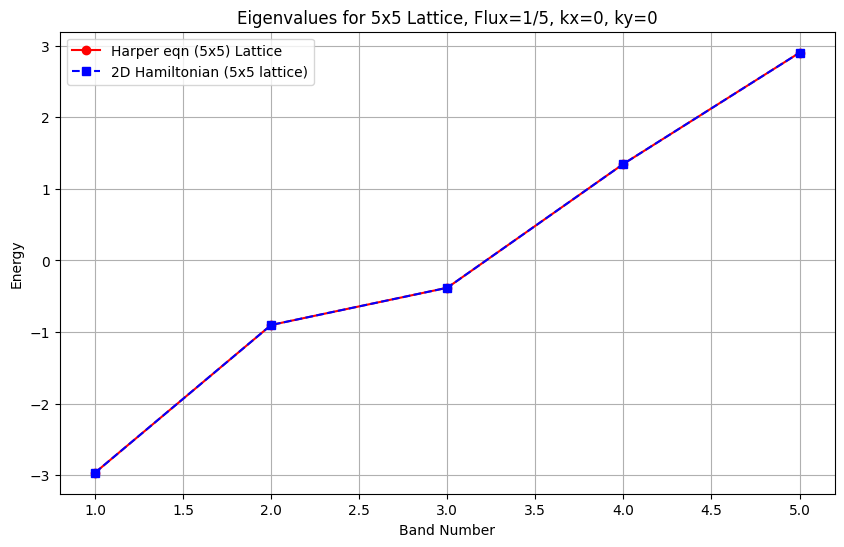

In [39]:
#Eigenvalues for 5x5 Lattice with Flux=1/5
kx, ky = 0, 0
H1=construct_harper_matrix(5, 1/5, kx, ky)
H12=construct_harper_matrix(5, 1/5, np.pi, np.pi)
eigvals1 = np.linalg.eigvalsh(H1)
eigvals12 = np.linalg.eigvalsh(H12)
print(f"Harper eigenvalues for momentum (0,0): {eigvals1}, \n for momentum (pi,pi): {eigvals12}")
#
H2 = find_hamiltonian_2d(5, 5, 1/5, kx, ky)
H22 = find_hamiltonian_2d(5, 5, 1/5, kx=np.pi, ky=np.pi)
eigvals2 = np.linalg.eigvalsh(H2)
eigvals22 = np.linalg.eigvalsh(H22)
unique_eig_2d = np.array([eigvals2[i*5] for i in range(5)])
print(f"2D Hamiltonian Eigenvalues for momentum (0,0) {eigvals2},\n for momentum (pi, pi) {eigvals22}")
band_number = np.arange(1, 6)
plt.figure(figsize=(10,6))
plt.plot(band_number, eigvals1, 'ro-', label='Harper eqn (5x5) Lattice')
plt.plot(band_number, unique_eig_2d, 'bs--', label='2D Hamiltonian (5x5 lattice)')
plt.xlabel('Band Number')
plt.ylabel('Energy')
plt.title(f'Eigenvalues for 5x5 Lattice, Flux=1/5, kx={kx}, ky={ky}')
plt.legend()
plt.grid(True)
plt.show()

In [40]:
#If a particle in 5x5 lattice with phi=1/5, follows the closed trajectory (24)->(19)->(20)->(25)->(24) it gains a phase of 2pi/5. (72 degrees)
phase_winding = np.angle(H2[23,18]*H2[18,19]*H2[19,24]*H2[24,23])
print(np.degrees(phase_winding))

72.0
